# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [365]:
# Import necessary libraries
# PyTorch
import torch
import torch.nn as nn

# Data Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path
from pathlib import Path

In [366]:
# Setup device-agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Device: {device}')

Device: cuda


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [367]:
# Create the data parameters
start = 0; end = 1; step_size = 0.01
weight = 0.3; bias = 0.9

# Make X and y using linear regression feature
X = torch.arange(start=start, end=end, step=step_size).unsqueeze(dim=1).to(device)
y = weight*X + bias


print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]], device='cuda:0')
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]], device='cuda:0')


In [368]:
# Split the data into training and testing
training_size = 0.8; training_split = int(len(X)*training_size)
X_train = X[:training_split,:]; y_train = y[:training_split,:]
X_test = X[training_split:,:]; y_test = y[training_split:,:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([80, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]))

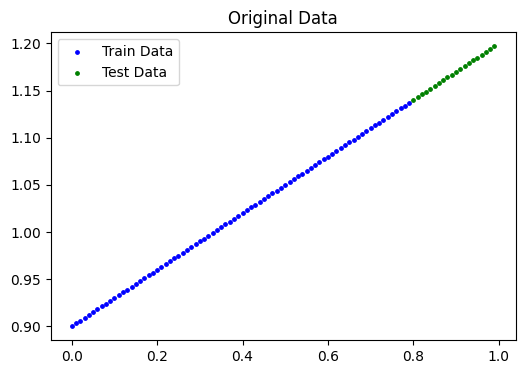

In [369]:
# Plot the training and testing data
def plot_preds(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, model_name='Original Data', preds=None):
    plt.figure(figsize=(6,4))
    plt.scatter(train_data.cpu().numpy(), train_labels.cpu().numpy(), c='b', s=6, label='Train Data')
    plt.scatter(test_data.cpu().numpy(), test_labels.cpu().numpy(), c='g', s=6, label='Test Data')
    plt.scatter(test_data.cpu().numpy(), preds.cpu().numpy(), c='r', s=5, marker='*', label='Predictions') if (preds is not None) else None
    plt.title(f'{model_name}') if (preds is None) else plt.title(f'{model_name} Predictions')
    plt.legend()
    plt.show()

plot_preds()

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [370]:
# Create PyTorch linear regression model by subclassing nn.Module
class My_Linear_Regression_Params(nn.Module):

    def __init__(self):
        super().__init__()

        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

    def forward(self, x):
        x = self.weight*x + self.bias
        return x 
    
class My_Linear_Regression_Layer(nn.Module):

    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        x = self.layer_1(x)
        return x 


In [371]:
# Instantiate the model and put it to the target device
my_seed = 42; torch.manual_seed(my_seed)
model_0 = My_Linear_Regression_Params().to(device)
model_1 = My_Linear_Regression_Layer().to(device)
model_0.state_dict(), model_1.state_dict()

(OrderedDict([('weight', tensor([0.3367], device='cuda:0')),
              ('bias', tensor([0.1288], device='cuda:0'))]),
 OrderedDict([('layer_1.weight', tensor([[-0.2191]], device='cuda:0')),
              ('layer_1.bias', tensor([0.2018], device='cuda:0'))]))

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [372]:
# Training loop
def train_model(model, train_data, train_labels, criterion, optimizer, epochs):
    print(f'\nTraining Model: {model._get_name()}')
    
    for epoch in range(epochs):
        # Training
        model.train()

        outputs = model(train_data)
        loss = criterion(outputs, train_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Testing
        if (epoch % max(1, epochs // 10) == 0):
            model.eval()
            with torch.inference_mode():
                test_output = model(X_test)
                test_loss = criterion(test_output, y_test)
            print(f'Epoch: {epoch:5} | Train_Loss: {loss:.5f} | Test_Loss: {test_loss:.5f}')
    print(f'Epoch: {epoch:5} | Train_Loss: {loss:.5f} | Test_Loss: {test_loss:.5f}')
    print(f'Successful Training! --> Final Parameters: {model.state_dict()}\n\n{'-'*70}')
    

# Create the loss function and optimizer
criterion = nn.L1Loss()
optimizer_0 = torch.optim.SGD(model_0.parameters(), lr=0.001)
optimizer_1 = torch.optim.SGD(model_1.parameters(), lr=0.001)

epochs = 2000

# Train models for 300 epochs
train_model(model_0, X_train, y_train, criterion, optimizer_0, epochs)
train_model(model_1, X_train, y_train, criterion, optimizer_1, epochs)




Training Model: My_Linear_Regression_Params
Epoch:     0 | Train_Loss: 0.75670 | Test_Loss: 0.73700
Epoch:   200 | Train_Loss: 0.52549 | Test_Loss: 0.46629
Epoch:   400 | Train_Loss: 0.29429 | Test_Loss: 0.19559
Epoch:   600 | Train_Loss: 0.07742 | Test_Loss: 0.06397
Epoch:   800 | Train_Loss: 0.05254 | Test_Loss: 0.11484
Epoch:  1000 | Train_Loss: 0.04548 | Test_Loss: 0.10512
Epoch:  1200 | Train_Loss: 0.03863 | Test_Loss: 0.08982
Epoch:  1400 | Train_Loss: 0.03178 | Test_Loss: 0.07452
Epoch:  1600 | Train_Loss: 0.02492 | Test_Loss: 0.05888
Epoch:  1800 | Train_Loss: 0.01807 | Test_Loss: 0.04265
Epoch:  1999 | Train_Loss: 0.01126 | Test_Loss: 0.04265
Successful Training! --> Final Parameters: OrderedDict({'weight': tensor([0.3559], device='cuda:0'), 'bias': tensor([0.8765], device='cuda:0')})

----------------------------------------------------------------------

Training Model: My_Linear_Regression_Layer
Epoch:     0 | Train_Loss: 0.90326 | Test_Loss: 1.16145
Epoch:   200 | Train_L

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

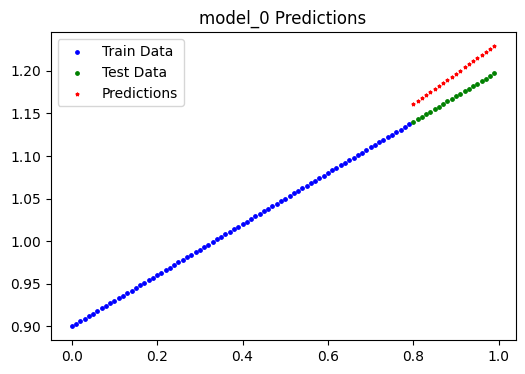

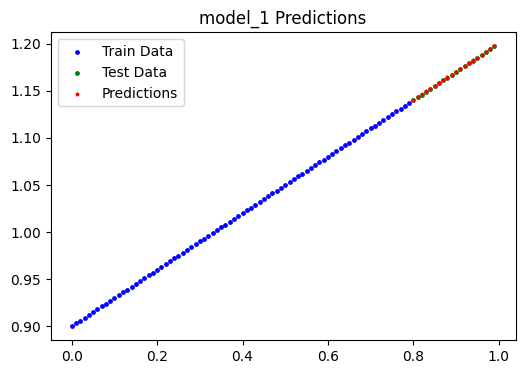

In [373]:
# Make predictions with the model
model_0.eval(); model_1.eval()
with torch.inference_mode():
    outputs_0 = model_0(X_test); outputs_1 = model_1(X_test)
    loss_0 = criterion(outputs_0, y_test); loss_1 = criterion(outputs_1, y_test)

plot_preds(preds=outputs_0, model_name='model_0')
plot_preds(preds=outputs_1, model_name='model_1')


## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [374]:
from pathlib import Path

# 1. Create models directory & name
FOLDER_PATH = Path('models'); FOLDER_PATH.mkdir(parents=True, exist_ok=True)
MODEL_0_NAME = '01_pytorch_workflow_model_0_exercise.pth'; MODEL_1_NAME = '01_pytorch_workflow_model_1_exercise.pth'

# 2. Save the model state dict
MODEL_0_SAVE_PATH = FOLDER_PATH / MODEL_0_NAME; torch.save(obj=model_0.state_dict(), f=MODEL_0_SAVE_PATH)
MODEL_1_SAVE_PATH = FOLDER_PATH / MODEL_1_NAME; torch.save(obj=model_1.state_dict(), f=MODEL_1_SAVE_PATH)


In [375]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model_0 = My_Linear_Regression_Params().to(device); loaded_model_0.load_state_dict(torch.load(f=MODEL_0_SAVE_PATH))
loaded_model_1 = My_Linear_Regression_Layer().to(device);  loaded_model_1.load_state_dict(torch.load(f=MODEL_1_SAVE_PATH))


<All keys matched successfully>

In [376]:
# Make predictions with loaded model and compare them to the previous
loaded_model_0.eval(); loaded_model_1.eval()
with torch.inference_mode():
    loaded_0_outputs = loaded_model_0(X_test)
    loaded_1_outputs = loaded_model_1(X_test)

# Verify that the predictions from the loaded models exactly match those from the original models.
torch.equal(loaded_0_outputs, outputs_0) == torch.equal(loaded_1_outputs, outputs_1) # All True for both model_0 and model_1 predictions, for both loaded and original versions.

True